# Data Science, Algorithms and Complexity in the Cyber Context - Coursework 1

### Student ID: 2136685

For this coursework will showcase a decision trees model and a support vector machine (SVM) model trained with the aim of recognising traffic as normal or malicious.

The initial datasets classify traffic using "classes", however there is a clear distinction between which is normal or abnormal traffic. Normal traffic is simply classed as "normal", whereas what can assumed as "abnormal" is traffic classed as "neptune", "saint", "warezclient", etc. Therefore, the data can be simplified by marking "normal" traffic with "1" and abnormal traffic (the rest) with "0".

Due to the nature of the data, a decision trees model was an appropriate choice for the problem to be solved. The data that the decision trees model will be trained with poses a simple question: is the traffic normal or not? Due to the question's simple enquiry and it being a yes-or-no question, a decision tree classifier can accurately and transparently show its decisions - by analising the decision tree structure. Although the model can be run without any pre-processing being needed for the data, to simplify the issue, the data will all be transformed into numerical data, superfluous features will be taken out and the data will be normalised, as shown in the section below (Bento, 2021). 

An SVM model was the other choice as it can handle binary classification as well as decision trees, allowing a fair comparison to be carried out. However, SVMs perform better with numerical, normalised data, therefore the data pre-processing section below is required. Using the same datasets for both the decision trees model and the SVM model also allows for a fair comparison (Martins, 2022).

The Python module _**scikit-learn**_ will be used to handle the machine learning models chosen, along with _**pandas**_ for handling the data. For visualising data, _**seaborn**_ and _**matplotlib**_ will be used, more specifically, for confusion matrices.

Some additional modules are used for one-off actions, such as the _**os**_ module for creating a folder for holding the datasets and for cleaning the folder up (deleting and renaming files).

## 1. Data Pre-Processing

The datasets that will be used for training are the full KDDTrain+ and the 20 percent KDDTrain+, and the KDDTest+ dataset wil be used for testing both the machine learning models.

### 1.1. Feature Names Insertion

The Python code below adds the feature names, gathered from the original archive, to the text file datasets. Moreover, the last column of data that holds no feature name, is dropped, as it was not identified in the original feature names. The code saves each file with their original file names, but as a .csv rather than a text file.

In [103]:
import os
import pandas as pd

# Make folder for datasets
folder_path = 'dataset/'
os.makedirs(folder_path, exist_ok=True)

# Adding feature names
attribute_names_path = 'NSL-KDD/attribute_names.txt'
data_path = ['NSL-KDD/KDDTest+.txt','NSL-KDD/KDDTrain+.txt','NSL-KDD/KDDTrain+_20Percent.txt']

for dataset in data_path:
    # Read attribute names from the file
    with open(attribute_names_path, 'r') as file:
        attribute_names = [line.strip() for line in file]

    # Load the dataset
    df = pd.read_csv(dataset, header=None, names=attribute_names)

    # Remove the last column ('??')
    df_no_class = df.drop(columns=['??'])

    # Save the modified DataFrame to a new file
    df_no_class.to_csv(f'dataset/{dataset[8:-4]}.csv', index=False)



### 1.2. Data Encoding

The original datasets has features, such as "protocol_type", "service" and "flag" that hold non-numerical data. Decision trees can handle numerical and non-numerical data, however SVM handles numerical data more accurately (Al Hamad and Zeki, 2018).


The Python script uses one-hot encoding. One-hot encoding ensures the data is not misinterpreted, unlike with integer encoding, where values such as "tcp", "icmp" and "smtp" could be given the values 0, 1 and 2 respectively. This can cause some models to believe some features are more important than others. As that is not the non-numerical features in the datasets, one-hot encoding was used (Brownlee, 2017; Yadav, 2019). 

The script below will take each instance of that non-numerical data and transform it into their own columns, each with true/false (0/1) binary data. 

Moreover, the script will take the non-numerical feature "class" and separately transform the data into whether it is "normal" (1) or anything else (0).

In [104]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
data_path = ['dataset/KDDTest+.csv','dataset/KDDTrain+.csv','dataset/KDDTrain+_20Percent.csv']
for dataset in data_path:
    df = pd.read_csv(dataset)

    df['class'] = df['class'].apply(lambda x: 1 if x == 'normal' else 0)

    # Identify categorical columns for one-hot encoding
    categorical_columns = ['protocol_type', 'service', 'flag']

    # Create a column transformer for one-hot encoding
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_columns)
        ],
        remainder='passthrough'
    )

    # Transform the test data
    encoded = preprocessor.fit_transform(df)

    # Convert the encoded NumPy arrays back to DataFrames
    encoded_df = pd.DataFrame(encoded, columns=preprocessor.get_feature_names_out(df.columns))

    # Save the encoded data to new CSV files
    encoded_df.to_csv(f'{dataset[:-4]}_encoded.csv', index=False)

Due to the encoding above, the datasets may now have different features as they may have had, for example, different protocols captured. The code below shows those differences between the datasets.

In [105]:
import pandas as pd

# Load the first CSV file
file1_path = 'dataset/KDDTrain+_encoded.csv'
df1 = pd.read_csv(file1_path)

data_path = ['dataset/KDDTrain+_20Percent_encoded.csv','dataset/KDDTest+_encoded.csv']
for dataset in data_path:
    df2 = pd.read_csv(dataset)

    print(f'{file1_path} vs. {dataset}')
    # Get the column names from each DataFrame
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    print(columns_df1)
    print(columns_df2)


    # Find the columns present in the first file but not in the second
    columns_only_in_df1 = columns_df1 - columns_df2

    # Find the columns present in the second file but not in the first
    columns_only_in_df2 = columns_df2 - columns_df1

    # Print the results
    print("Columns only in the first file:", columns_only_in_df1)
    print("Columns only in the second file:", columns_only_in_df2)

    print()



dataset/KDDTrain+_encoded.csv vs. dataset/KDDTrain+_20Percent_encoded.csv
{'cat__service_login', 'cat__service_finger', 'remainder__srv_serror_rate', 'remainder__rerror_rate', 'cat__service_urp_i', 'remainder__dst_host_srv_count', 'remainder__diff_srv_rate', 'cat__service_echo', 'cat__service_nnsp', 'remainder__dst_host_srv_diff_host_rate', 'cat__service_auth', 'cat__service_ntp_u', 'cat__service_nntp', 'cat__service_csnet_ns', 'cat__service_http_8001', 'cat__service_systat', 'cat__service_urh_i', 'cat__flag_OTH', 'cat__service_uucp', 'cat__protocol_type_tcp', 'cat__service_aol', 'remainder__dst_host_same_srv_rate', 'cat__service_ftp_data', 'cat__service_gopher', 'cat__service_netbios_dgm', 'cat__service_netbios_ns', 'cat__service_imap4', 'cat__service_ldap', 'cat__service_kshell', 'cat__service_vmnet', 'cat__flag_S1', 'cat__service_http_443', 'remainder__hot', 'cat__service_printer', 'cat__service_ctf', 'cat__flag_RSTO', 'remainder__land', 'cat__flag_RSTR', 'cat__service_http', 'remai

The testing dataset features must be the same as the features that the model was trained on, the training dataset. Moreover, to simplify the folder structure and not generate a separate testing dataset for the 20 percent training dataset, the 20 percent training dataset must also have the same features as the full training dataset.

The code below finds all columns in the full training dataset, compares them to the 20 percent training dataset and the testing dataset, then adds the missing columns to each file, respectively.

In [106]:
import pandas as pd
main_set= 'dataset/KDDTrain+_encoded.csv'
df1 = pd.read_csv(main_set)

data_path = ['dataset/KDDTrain+_20Percent_encoded.csv','dataset/KDDTest+_encoded.csv']
for dataset in data_path:
    df2 = pd.read_csv(dataset)
    missing_columns = set(df1.columns) - set(df2.columns)
    if missing_columns:
        print(f"Columns missing in {dataset} file. Adding missing columns...")
        for column in missing_columns:
            df2[column] = 0  # Add missing column with default value 0

    # Rearrange columns in the second DataFrame to match the order of the reference DataFrame
    df2 = df2[df1.columns]

    # Save the rearranged DataFrame to a new CSV file
    df2.to_csv(f'{dataset[:-4]}_v2.csv', index=False)

Columns missing in dataset/KDDTrain+_20Percent_encoded.csv file. Adding missing columns...
Columns missing in dataset/KDDTest+_encoded.csv file. Adding missing columns...


The code below checks the features again, to confirm that the columns have been successfully added and that all datasets now have the same features.

In [107]:
import pandas as pd

# Load the first CSV file
file1_path = 'dataset/KDDTrain+_encoded.csv'
df1 = pd.read_csv(file1_path)

data_path = ['dataset/KDDTrain+_20Percent_encoded_v2.csv','dataset/KDDTest+_encoded_v2.csv']
for dataset in data_path:
    df2 = pd.read_csv(dataset)

    print(f'{file1_path} vs. {dataset}')
    # Get the column names from each DataFrame
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    print(columns_df1)
    print(columns_df2)


    # Find the columns present in the first file but not in the second
    columns_only_in_df1 = columns_df1 - columns_df2

    # Find the columns present in the second file but not in the first
    columns_only_in_df2 = columns_df2 - columns_df1

    # Print the results
    print("Columns only in the first file:", columns_only_in_df1)
    print("Columns only in the second file:", columns_only_in_df2)

    print()



dataset/KDDTrain+_encoded.csv vs. dataset/KDDTrain+_20Percent_encoded_v2.csv
{'cat__service_login', 'cat__service_finger', 'remainder__srv_serror_rate', 'remainder__rerror_rate', 'cat__service_urp_i', 'remainder__dst_host_srv_count', 'remainder__diff_srv_rate', 'cat__service_echo', 'cat__service_nnsp', 'remainder__dst_host_srv_diff_host_rate', 'cat__service_auth', 'cat__service_ntp_u', 'cat__service_nntp', 'cat__service_csnet_ns', 'cat__service_http_8001', 'cat__service_systat', 'cat__service_urh_i', 'cat__flag_OTH', 'cat__service_uucp', 'cat__protocol_type_tcp', 'cat__service_aol', 'remainder__dst_host_same_srv_rate', 'cat__service_ftp_data', 'cat__service_gopher', 'cat__service_netbios_dgm', 'cat__service_netbios_ns', 'cat__service_imap4', 'cat__service_ldap', 'cat__service_kshell', 'cat__service_vmnet', 'cat__flag_S1', 'cat__service_http_443', 'remainder__hot', 'cat__service_printer', 'cat__service_ctf', 'cat__flag_RSTO', 'remainder__land', 'cat__flag_RSTR', 'cat__service_http', 're

### 1.3. Redundant and Relevant Data

The code below checks for redundant features, ensuring that the features that remain in the dataset are relevant.

In [108]:
import pandas as pd

def find_columns_with_zeros_only(dataframe):
    zero_columns = []
    
    for column in dataframe.columns:
        if (dataframe[column] == 0).all():
            zero_columns.append(column)
    
    return zero_columns

data_path = ['dataset/KDDTrain+_encoded.csv','dataset/KDDTrain+_20Percent_encoded_v2.csv','dataset/KDDTest+_encoded_v2.csv']
for dataset in data_path:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(dataset)

    print(f'{dataset}')
    zero_columns = find_columns_with_zeros_only(df)

    if zero_columns:
        print(f"Columns with all 0s: {', '.join(zero_columns)}\n")
    else:
        print("No columns found with all 0s.\n")



dataset/KDDTrain+_encoded.csv
Columns with all 0s: remainder__num_outbound_cmds

dataset/KDDTrain+_20Percent_encoded_v2.csv
Columns with all 0s: cat__service_aol, cat__service_harvest, cat__service_http_2784, cat__service_tftp_u, remainder__num_outbound_cmds, remainder__is_host_login

dataset/KDDTest+_encoded_v2.csv
Columns with all 0s: cat__service_aol, cat__service_harvest, cat__service_http_2784, cat__service_http_8001, cat__service_red_i, cat__service_urh_i, remainder__num_outbound_cmds



The features which are to be dropped can only come from the full training dataset, for the same reason explained in the section above. Therefore, only feature "remainder__num_outbound_cmds" will be dropped from all datasets.

In [109]:
import pandas as pd

def find_columns_with_zeros_only(dataframe):
    zero_columns = []
    
    for column in dataframe.columns:
        if (dataframe[column] == 0).all():
            zero_columns.append(column)
    
    return zero_columns

def drop_columns_from_csv(csv_file_path, columns_to_drop):
    # Read the CSV file into a DataFrame
    dataframe = pd.read_csv(csv_file_path)
    
    # Drop columns with all 0s
    dataframe = dataframe.drop(columns=columns_to_drop, errors='ignore')
    
    # Save the modified DataFrame to a new CSV file
    modified_csv_path = csv_file_path.replace('.csv', '_nored.csv')
    dataframe.to_csv(modified_csv_path, index=False)
    

# For the full training dataset
csv_file_path1 = 'dataset/KDDTrain+_encoded.csv'
csv_file_path2 = ['dataset/KDDTrain+_20Percent_encoded_v2.csv','dataset/KDDTest+_encoded_v2.csv']

# Read the CSV files into DataFrames
dataframe1 = pd.read_csv(csv_file_path1)

# Find columns with all 0s in file 1
zero_columns1 = find_columns_with_zeros_only(dataframe1)

# Drop columns with all 0s from file 2
modified_csv_path1 = drop_columns_from_csv(csv_file_path1, zero_columns1)
for dataset in csv_file_path2:
    # Test columns must be the same as Train+ file columns
    modified_csv_path2 = drop_columns_from_csv(dataset, zero_columns1)


### 1.4. Feature Importance using Decision Trees

Feature importance can help a model ensure that it does not become unnecessarily complex. By selecting out unimportant features (reducing noise), the model using the datasets will become more accurate, all while reducing computational complexity and testing time (Ruggieri, 2019).

To do feature importance, there must be a classifier present. The Python code below trains a decision tree classifier on the encoded and no-redundant-features full training dataset. The classifier will rank the features found in the dataset and return their values. The features that the classifier ranks with "0" will be deemed unimportant and dropped from all datasets. 

The training of a decision tree classifier will be covered more in-depth after the data pre-processing section.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("dataset/KDDTrain+_encoded_nored.csv")

# Separate features and target variable
X = df.drop('remainder__class', axis=1)
y = df['remainder__class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5555)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=5555)

# Train the classifier on the training data
clf.fit(X_train, y_train)

clf.score(X_val,y_val)

0.9976979559436396

The code below tests the model against the most updated version of the testing dataset. Testing a classifier with its default parameters gives an 80 percent accuracy score. However, the testing carried out here is to verify that there is nothing wrong with the model and that feature selection can be carried out.

In [111]:
df_test = pd.read_csv("dataset/KDDTest+_encoded_v2_nored.csv")

# Separate features and target variable
X_test = df_test.drop('remainder__class', axis=1)
y_test = df_test['remainder__class']

clf.score(X_test,y_test)

0.8042051100070973

Getting the important features using the scikit-learn library. The features where the *feature_importance* output is 0 will be dropped from all datasets.

In [112]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Get feature importances
feature_importances = clf.feature_importances_

# Identify columns with zero importance
zero_importance_columns = X.columns[feature_importances == 0]

file_path = ['dataset/KDDTrain+_20Percent_encoded_v2_nored.csv','dataset/KDDTrain+_encoded_nored.csv','dataset/KDDTest+_encoded_v2_nored.csv']
for dataset in file_path:

    df_original = pd.read_csv(dataset)

    # Drop columns with zero importance
    df_modified = df_original.drop(zero_importance_columns, axis=1)

    # Save the modified DataFrame to a new CSV file
    new_file_path = f'{dataset[:-4]}_features.csv' 
    df_modified.to_csv(new_file_path, index=False)


The following section uses min-max normalisation in order to scale the data. Scaled data allows the SVM model to perform significantly better, also reducing the computational task on the machine running the training.

Min-max normalisation ensures that the data scale for each feature is not so drastically different, allowing the models to better visualise the data and classify them more accurately (Codeacademy, 2024).

In [113]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_path = ['dataset/KDDTest+_encoded_v2_nored_features.csv','dataset/KDDTrain+_20Percent_encoded_v2_nored_features.csv','dataset/KDDTrain+_encoded_nored_features.csv']

for dataset in data_path:
    data = pd.read_csv(dataset)

    X = data.drop('remainder__class', axis=1)
    y = data['remainder__class']

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler on the features and transform the data
    X_scaled = scaler.fit_transform(X)

    # Create a new DataFrame with the scaled features and the target variable
    scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
    scaled_data['remainder__class'] = y

    # Save the scaled data to a new CSV file
    scaled_data.to_csv(f'{dataset[:-4]}_scaled.csv', index=False)


A lot of dataset files have been created at each step above to arrive to the last iteration of the datasets, the normalised versions. The code below will delete all files, except the scaled versions of the datasets.

In [114]:
import os

folder_path = 'dataset/'
files_to_keep = ['KDDTest+_encoded_v2_nored_features_scaled.csv','KDDTrain+_20Percent_encoded_v2_nored_features_scaled.csv','KDDTrain+_encoded_nored_features_scaled.csv']

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Use a list comprehension to create a list of files to delete
files_to_delete = [file for file in all_files if file not in files_to_keep]

# Delete each file in the list
for file in files_to_delete:
    file_path = os.path.join(folder_path, file)
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

Deleted: dataset/KDDTrain+_encoded_nored.csv
Deleted: dataset/KDDTest+_encoded_v2_nored.csv
Deleted: dataset/KDDTrain+_20Percent_encoded.csv
Deleted: dataset/KDDTest+_encoded.csv
Deleted: dataset/KDDTrain+.csv
Deleted: dataset/KDDTrain+_20Percent_encoded_v2.csv
Deleted: dataset/KDDTest+_encoded_v2_nored_features.csv
Deleted: dataset/KDDTrain+_20Percent_encoded_v2_nored_features.csv
Deleted: dataset/KDDTest+.csv
Deleted: dataset/KDDTrain+_20Percent_encoded_v2_nored.csv
Deleted: dataset/KDDTrain+_encoded.csv
Deleted: dataset/KDDTrain+_20Percent.csv
Deleted: dataset/KDDTest+_encoded_v2.csv
Deleted: dataset/KDDTrain+_encoded_nored_features.csv


Once there are only the three final versions of the datasets left in the "datasets/" folder, they will be renamed to a more legible name "KDDTrain+.csv", "KDDTrain+_20Percent.csv" and "KDDTest+.csv".

In [115]:
import os

folder_path = 'dataset/'
# Define the mapping of old names to new names
file_mapping = {
    'KDDTest+_encoded_v2_nored_features_scaled.csv': 'KDDTest+.csv',
    'KDDTrain+_20Percent_encoded_v2_nored_features_scaled.csv': 'KDDTrain+_20Percent.csv',
    'KDDTrain+_encoded_nored_features_scaled.csv': 'KDDTrain+.csv'
}

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Rename each file in the list if it is in the mapping
for old_name in all_files:
    old_path = os.path.join(folder_path, old_name)
    
    if old_name in file_mapping:
        new_name = file_mapping[old_name]
        new_path = os.path.join(folder_path, new_name)
        
        try:
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} to {new_path}")
        except Exception as e:
            print(f"Error renaming {old_path}: {e}")


Renamed: dataset/KDDTrain+_encoded_nored_features_scaled.csv to dataset/KDDTrain+.csv
Renamed: dataset/KDDTrain+_20Percent_encoded_v2_nored_features_scaled.csv to dataset/KDDTrain+_20Percent.csv
Renamed: dataset/KDDTest+_encoded_v2_nored_features_scaled.csv to dataset/KDDTest+.csv


## 2. Machine Learning Models

As stated previously, a decision trees model and an SVM model will be trained to solve the problem.

### 2.1. Decision Trees Model

The decision trees classifier below is the result of fine-tuning hyperparameters using grid search cross-validation and randomised search cross-validation methods, which will each be analysed more in-depth in the sections below. The model, "clf", uses 80 percent of the full training dataset to train itself, then it uses the remaining 20 percent to validate that it was trained correctly. Initially, the model was trained with a 50:50 split between training and validating sets, however as the model does not take a lot of computational power to train, the 80:20 split was used throughout, thus requiring less iterations to achieve a desirable accuracy.

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("dataset/KDDTrain+.csv")

# Separate features and target variable
X = df.drop('remainder__class', axis=1)
y = df['remainder__class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5555)

# Create a decision tree classifier with hyperparameter tunings
clf = DecisionTreeClassifier(max_depth=19, min_samples_leaf=4, min_samples_split=10, random_state=5555)

# Train the classifier on the training data
model = clf.fit(X_train, y_train)

model.score(X_val, y_val)

0.9957928160349275

After training, the model is tested on the full testing dataset. It makes predictions on whether the traffic is normal or not by taking all of the features, except the "remainder__class" feature, as seen in line 11 below. The accuracy of that prediction is tested on the real values of the "remainder__class", shown in the output of the code.

To further analyse the result of the testing, a classification report and a confusion matrix is generated.

The classification report has a few columns:
+ **Support** is how many samples of each class exists in the testing dataset. There are 12833 true negatives and 9711 true positives (Krishnan, 2018; Zach, 2022)
+ **Precision** is how many of the model's true predictions are correct out of the total predictions. For this model, for true negatives, the precision was 95 percent out of the sum of true and false negatives. On the other hand, the precision for true positives was only 73 percent (Krishnan, 2018; Zach, 2022)
+ **Recall** is how many true predictions can the model find out of the total actual true samples. For true negatives, out of 12833 samples, the model only found 74 percent of them, whereas it found 95 percent of the true positives, out of 9711 samples (Krishnan, 2018; Zach, 2022)
+ **F1-Score** is the weighted harmonic mean of the precision and recall. This score will be used to compare the decision trees model and the SVM model in a section below (Krishnan, 2018; Zach, 2022).

The confusion matrix below graphically shows how many true negatives and positives, as well as false negatives and positives, the decision trees model generated.

0.8296220723917672
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83     12833
         1.0       0.73      0.95      0.83      9711

    accuracy                           0.83     22544
   macro avg       0.84      0.84      0.83     22544
weighted avg       0.86      0.83      0.83     22544



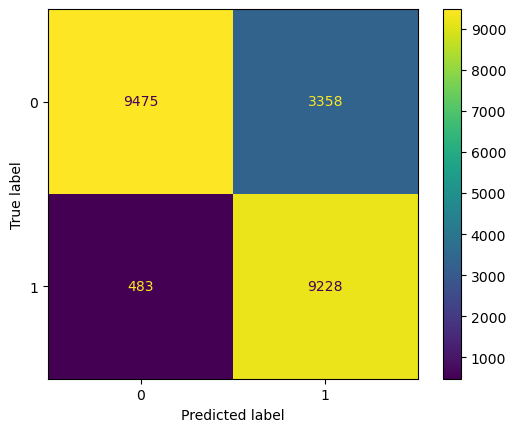

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.read_csv("dataset/KDDTest+.csv")

# Separate features and target variable
X_test = df_test.drop('remainder__class', axis=1)
y_test = df_test['remainder__class']

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

The decision trees model has 9475 true negatives and 9228 true positives, as well as 483 false negatives and 3358 false positives.

#### 2.1.1. Hyperparameter Tuning

To achieve the decision trees model above, hyperparameter tuning was carried out using a grid search cross-validation and randomised search cross-validation.

##### 2.1.1.a. Grid Search Cross-Validation

The parameters below have been selected as, through rigorous testing, they were the only parameters that had a positive effect on the accuracy of the model, although when testing, the rvs() function would have generated 10 random values instead of 1.

The **max_depth** parameter restricts the maximum depth of the decision tree model (Hoffman, 2020). <br>
The **min_samples_split** parameter denotes the minimum amount of samples required for an internal node to be split. If the amount of samples is less than the value for **min_samples_split**, the internal node will become a leaf node (Hoffman, 2020).<br>
The **min_samples_leaf** parameter shows the minimum samples required to be at a leaf node (Hoffman, 2020).<br>

The random integer function below allowed the model to be tested with a range of values, speeding up hyperparameter tuning significantly, as the model does not require much computational power. The upper and lower bounds of the random integer generation were adjusted given the previous best interation, until moving the upper and lower bounds would no longer have a positive effect on the testing accuracy.

In [118]:
from scipy.stats import randint
grid = {
    'max_depth': [None] + list(randint(17, 27).rvs(1)),  
    'min_samples_split': list(randint(4, 14).rvs(1)), 
    'min_samples_leaf': list(randint(3, 20).rvs(1))
}

The grid search takes the decision trees classifier and the grid above as its parameters. The **n_jobs=-1** parameter ensures that the search uses all available threads, and **verbose=3** gives a detailed output of each fit, as seen below.

In [119]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(estimator = clf, param_grid = grid, n_jobs=-1, verbose=3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=6;, score=0.994 total time=   0.5s
[CV 2/5] END max_depth=None, min_samples_leaf=13, min_samples_split=6;, score=0.995 total time=   0.5s
[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=6;, score=0.994 total time=   0.5s
[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=6;, score=0.995 total time=   0.5s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=6;, score=0.995 total time=   0.5s
[CV 2/5] END max_depth=18, min_samples_leaf=13, min_samples_split=6;, score=0.995 total time=   0.5s
[CV 4/5] END max_depth=18, min_samples_leaf=13, min_samples_split=6;, score=0.995 total time=   0.5s
[CV 3/5] END max_depth=18, min_samples_leaf=13, min_samples_split=6;, score=0.994 total time=   0.5s
[CV 1/5] END max_depth=18, min_samples_leaf=13, min_samples_split=6;, score=0.994 total time=   0.5s
[CV 5/5] END max_depth=18, min_samples_leaf=13, min_samples_split=6;, score=0.995

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=19, min_samples_leaf=4,
                                              min_samples_split=10,
                                              random_state=5555),
             n_jobs=-1,
             param_grid={'max_depth': [None, 18], 'min_samples_leaf': [13],
                         'min_samples_split': [6]},
             verbose=3)

The result of the grid search can be found using the **best_params_** method and mounted with **best_estimator_**. The parameters can be fit on the model, re-training, re-validating and re-testing. The whole grid search process is iterated until the testing accuracy is satisfactory. However, as the **best_estimator_** aims for a better validation accuracy, sometimes hand-refined values will have a better accuracy than the **best_estimator_**, which is what occurred with the model displayed in the beginning of this section.

In [120]:
best_params = gcv.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 13, 'min_samples_split': 6}


In [121]:
best_model = gcv.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=13, min_samples_split=6,
                       random_state=5555)

In [122]:
best_model.score(X_val, y_val)

0.9959118872792221

In [123]:
best_model.score(X_test, y_test)

0.7747072391767211

##### 2.1.1.a. Randomised Search Cross-Validation

The randomised search cross-validation is a method that was mainly used in tuning the SVM model below, as the SVM model is more computationally demanding, asking it to iterate through all of the values in a grid search would take a long time, therefore a randomised search was used instead as you can control the number of fits using the **n_iter** (iterations) and **cv** (folds) parameters below.

In [124]:
from scipy.stats import randint
param_dist = {
    'max_depth': [None] + list(randint(3, 20).rvs(10)),  
    'min_samples_split': list(randint(2, 20).rvs(10)), 
    'min_samples_leaf': list(randint(1, 20).rvs(10))
}

In [125]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=2, cv=5, random_state=5555, n_jobs=-1, verbose=3)

In [126]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[CV 1/5] END max_depth=5, min_samples_leaf=6, min_samples_split=18;, score=0.970 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=6, min_samples_split=18;, score=0.971 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=6, min_samples_split=18;, score=0.972 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=6, min_samples_split=18;, score=0.973 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=6, min_samples_split=18;, score=0.973 total time=   0.2s
[CV 1/5] END max_depth=15, min_samples_leaf=6, min_samples_split=9;, score=0.995 total time=   0.5s
[CV 3/5] END max_depth=15, min_samples_leaf=6, min_samples_split=9;, score=0.995 total time=   0.5s
[CV 2/5] END max_depth=15, min_samples_leaf=6, min_samples_split=9;, score=0.995 total time=   0.5s
[CV 5/5] END max_depth=15, min_samples_leaf=6, min_samples_split=9;, score=0.995 total time=   0.5s
[CV 4/5] END max_depth=15, min_samples_leaf=6, min_samples_split=9;, score=0.996 total time=   0.5s


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=19,
                                                    min_samples_leaf=4,
                                                    min_samples_split=10,
                                                    random_state=5555),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [None, 19, 9, 7, 14, 18,
                                                      16, 15, 10, 16, 5],
                                        'min_samples_leaf': [15, 10, 19, 15, 15,
                                                             14, 18, 15, 15,
                                                             6],
                                        'min_samples_split': [4, 10, 13, 4, 15,
                                                              5, 2, 9, 18,
                                                              17]},
                   random_state=5555, verbose=3)

In [127]:
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'min_samples_split': 9, 'min_samples_leaf': 6, 'max_depth': 15}


In [128]:
best_model2 = random_search.best_estimator_
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=6, min_samples_split=9,
                       random_state=5555)

In [129]:
best_model2.score(X_val, y_val)

0.9956737447906331

In [130]:
best_model2.score(X_test, y_test)

0.7867725337118524

### 2.2. Support Vector Machine Model

#### 2.2.1. Hyperparameter Tuning

The SVM model below had its hyperparameters tuned by testing several kernels, "linear", "rbf" and "poly" using randomised search cross-validation. The model used the 20 percent training dataset, beginning with a 60:40 training:validation split, then with a 80:20 validation split, as using the full dataset took a more considerable amount of time. The full dataset was only used when testing.<br>
Once the randomised search tuning stopped improving the accuracy, the model was tuned with grid search cross-validation and using the uniform() function to find finely-tuned values for each parameter.

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset/KDDTrain+_20Percent.csv')
features = df.drop('remainder__class', axis=1)
labels = df['remainder__class']

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=5555)

In [132]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [133]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

svc = SVC()

parameters = {
    'kernel': ['poly'],
    'C': [7.003423186707748],
    'degree': [10],
    'coef0': [0.5099648246593279],
}

param_rand = {
    'kernel': ['poly'],
    'C': uniform(loc=7, scale=0.25),
    'degree': [9, 10, 11],
    'coef0': uniform(loc=0.5, scale=0.125),
}


cv = GridSearchCV(svc, parameters, cv=5, n_jobs=-1, verbose=3)
cv.fit(X_train, y_train.values.ravel())

# cv = RandomizedSearchCV(svc, param_rand, n_iter=60, cv=5, random_state=5555, n_jobs=-1, verbose=3)
# cv.fit(X_train, y_train.values.ravel())

print_results(cv)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel=poly;, score=0.992 total time=   0.6s
[CV 2/5] END C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel=poly;, score=0.994 total time=   0.6s
[CV 3/5] END C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel=poly;, score=0.993 total time=   0.7s
[CV 1/5] END C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel=poly;, score=0.992 total time=   0.8s
[CV 4/5] END C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel=poly;, score=0.993 total time=   0.8s
BEST PARAMS: {'C': 7.003423186707748, 'coef0': 0.5099648246593279, 'degree': 10, 'kernel': 'poly'}

0.993 (+/-0.001) for {'C': 7.003423186707748, 'coef0': 0.5099648246593279, 'degree': 10, 'kernel': 'poly'}


In [134]:
cv.best_estimator_

SVC(C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel='poly')

In [135]:
cv.score(X_val,y_val)

0.9956340543758683

In [136]:
svc_test = pd.read_csv("dataset/KDDTest+.csv")

# Separate features and target variable
X_test = svc_test.drop('remainder__class', axis=1)
y_test = svc_test['remainder__class']

In [137]:
cv.score(X_test,y_test)

0.8202182398864443

#### 2.2.2. Tuned SVM Model and Comparison

The SVM model below is trained on the full model and, using its hyperparameters, it gives an accuracy of 81 percent.

The classification report is similar to that of the decision trees model, as it also performed worse at precision for true positives (71 percent) and worse at recalling for true negatives (70 percent). However, overall, the decision trees model was able to more accurately perform precision and recalling with scores of 73 and 74 percent, respectively. Moreover, the SVM model achieved an f1 score of 81 and 82 for true negatives and true positives, respectively, whereas the decision trees model achieved 83 for both, making the decision trees model marginally better.

The confusion matrices also look similar between the models, however the SVM model has around half as many false negatives, 274 compared to 483, but many more false positives, at 3902 compared to 3358.

Overall, the models achieved a similar accuracy, however due to the decision trees model having a much smaller computational strain and being much time-consuming for both training and hyperparameter tuning, a decision trees model is more suited for solving the problem.

Validation score:  0.9961500297678111
Testing score:  0.8147622427253371
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     12833
         1.0       0.71      0.97      0.82      9711

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.86      0.81      0.81     22544



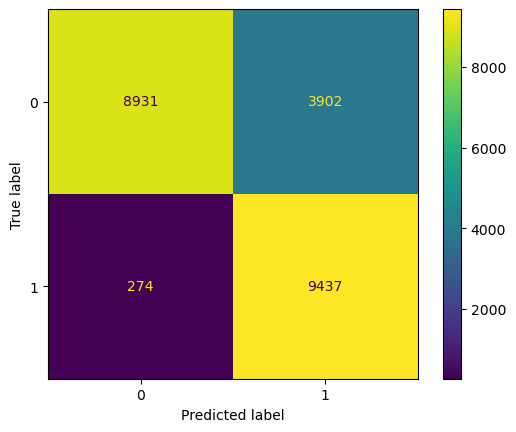

In [138]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset/KDDTrain+.csv')
df.head()

features = df.drop('remainder__class', axis=1)
labels = df['remainder__class']

# split training dataset into training and validation sets at 80:20
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=5555)

# Generate an svm classifier with hyperparameter tunings
svc = SVC(C=7.003423186707748, coef0=0.5099648246593279, degree=10, kernel='poly')
svc.fit(X_train, y_train.values.ravel())

print("Validation score: ",svc.score(X_val,y_val))

svc_test = pd.read_csv("dataset/KDDTest+.csv")

# Separate features and target variable
X_test = svc_test.drop('remainder__class', axis=1)
y_test = svc_test['remainder__class']

# Evaluate testing score
print("Testing score: ",svc.score(X_test,y_test))

y_pred = svc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## 3. References

Al Hamad, M. and Zeki, A.M. (2018). Accuracy vs. Cost in Decision Trees: A Survey. 2018 International Conference on Innovation and Intelligence for Informatics, Computing, and Technologies (3ICT). doi:https://doi.org/10.1109/3ict.2018.8855780.

Bento, C. (2021). Decision Tree Classifier explained in real-life: picking a vacation destination. [online] Medium. Available at: https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575.

Brownlee, J. (2017). Why One-Hot Encode Data in Machine Learning? [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/.

Codeacademy (2024). Normalization. [online] Codecademy. Available at: https://www.codecademy.com/article/normalization.

Hoffman, K. (2020). Decision Tree Hyperparameters Explained. [online] Medium. Available at: https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e.

Krishnan, M. (2018). Understanding the Classification report through sklearn. [online] Muthukrishnan. Available at: https://muthu.co/understanding-the-classification-report-in-sklearn/.

Martins, C. (2022). Support Vector Machine (SVM) for Binary and Multiclass Classification: Hands-On with SciKit-Learn. [online] Medium. Available at: https://pub.towardsai.net/support-vector-machine-svm-for-binary-and-multiclass-classification-hands-on-with-scikit-learn-29cdbe5cb90e.

Ruggieri, S. (2019). Complete Search for Feature Selection in Decision Trees. Journal of Machine Learning Research, [online] 20, pp.1–34. Available at: https://jmlr.org/papers/volume20/18-035/18-035.pdf.

Yadav, D. (2019). Categorical encoding using Label-Encoding and One-Hot-Encoder. [online] Medium. Available at: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd.

Zach (2022). How to Interpret the Classification Report in sklearn (With Example). [online] Statology. Available at: https://www.statology.org/sklearn-classification-report/.